<h1 style="color:darkmagenta; font-family:Cursive">
    <center>
        <b>Detection of Outliers of Data Science Job Salary</b>
    </center>
</h1>

## <div><p style="color:#b50264; font-family:Cursive"><b>🎯 Notebook Goal</p></div>

1. **Detecting the outliers** of the salary of Data Science Job.

## <div><p style="color:#b50264; font-family:Cursive"><b>🏷️ Table of Contents</p></div>
<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">

   1. [Import Necessary Libraries](#1)
   2. [Getting Data](#2)
   3. [Detecting Outliers](#3)
   4. [Visualizing Outliers](#4)
   5. [Dropping Outliers from data](#5)

<a id="1"></a>
## <div><p style="color:darkmagenta; font-family:Cursive"><b>1. Import Necessary Libraries</p></div>

In [1]:
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import plotly.express as px

# style
%matplotlib inline

<a id="2"></a>
## <div><p style="color:darkmagenta; font-family:Cursive"><b>2. Getting Data</p></div>

In [2]:
# read data and create DataFrame
df = pd.read_csv("../data_given/ds_salaries.csv", index_col=0)
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


<a id="3"></a>
## <div><p style="color:darkmagenta; font-family:Cursive"><b>3. Detecting Outliers</p></div>

In [3]:
# Quartile information show
def show_quartile(quartile, percentile, col_name, quarter_value):
    print("Value of {}:".format(quartile))
    print(f"{quartile}: {percentile} percentile of the {col_name} values is: ", quarter_value)

In [4]:
# Calculate interquartile range
def interquartile_range(quartile):
    q1 = quartile[0]
    q3 = quartile[2]
    return q3 - q1

In [5]:
# Limit finder
def limit_finder(quartile, interquartile_range):
    q1 = quartile[0]
    q3 = quartile[2]

    low = q1 - 1.5 * interquartile_range
    up = q3 + 1.5 * interquartile_range

    return low, up

In [6]:
# Finding outliers
def find_outliers(data, low, up):
    outliers = []
    for value in data:
        if (value < low) or (value > up):
            outliers.append(value)

    return outliers

In [7]:
# Outliers detection method
def detect_outlier(data):
    quartile_list = []
    sorted_data = data.sort_values()

    quarters = {"Q1": 25, "Q2": 50, "Q3": 75}
    for q, p in quarters.items():
        quarter_value = np.percentile(sorted_data, p, method = "midpoint")
        quartile_list.append(quarter_value)
        show_quartile(q, p, data.name, quarter_value)

    iqr = interquartile_range(quartile_list)
    print("\nInterquartile range is: ", iqr)

    low_limit, up_limit = limit_finder(quartile_list, iqr)
    print("\nLow Limit is: ", low_limit)
    print("Up Limit is: ", up_limit)

    outliers = find_outliers(sorted_data, low_limit, up_limit)
    print("\nOutliers in the dataset is: ", outliers)

In [8]:
detect_outlier(df["salary_in_usd"])

Value of Q1:
Q1: 25 percentile of the salary_in_usd values is:  62726.0
Value of Q2:
Q2: 50 percentile of the salary_in_usd values is:  101570.0
Value of Q3:
Q3: 75 percentile of the salary_in_usd values is:  150000.0

Interquartile range is:  87274.0

Low Limit is:  -68185.0
Up Limit is:  280911.0

Outliers in the dataset is:  [324000, 325000, 380000, 405000, 412000, 416000, 423000, 450000, 450000, 600000]


<a id="4"></a>
## <div><p style="color:darkmagenta; font-family:Cursive"><b>4. Visualizing Outliers</p></div>

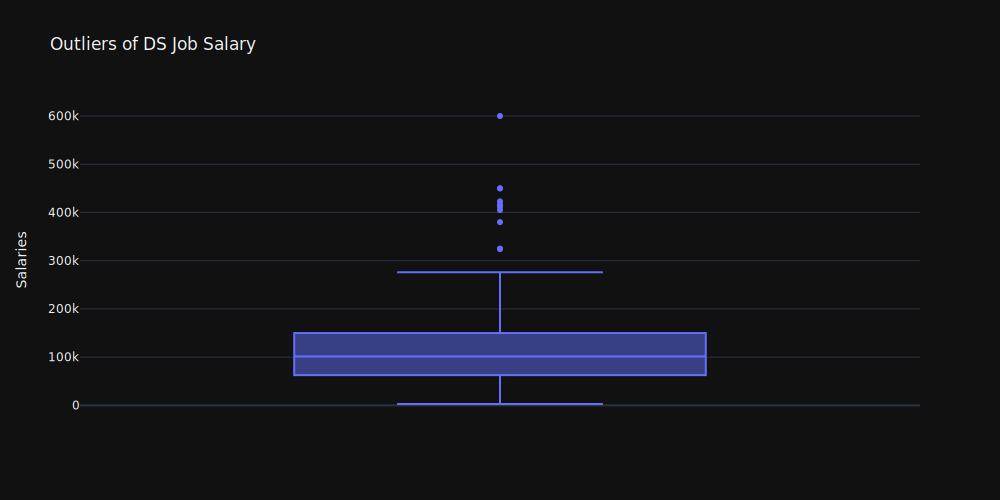

In [9]:
# Plotting Outliers
fig = px.box(y = df["salary_in_usd"],
             width = 1000,
             template = "plotly_dark",
             title = "Outliers of DS Job Salary")

fig.update_layout(yaxis_title = "Salaries")

fig.show('svg')


<a id="5"></a>
## <div><p style="color:darkmagenta; font-family:Cursive"><b>5. Dropping Outliers from data</p></div>

In [10]:
# Drop outliers
low_limit = -68185.0
up_limit = 280911.0

clean_data = df[(df["salary_in_usd"] < up_limit) & (df["salary_in_usd"] > low_limit)]
print("Minimum Salary of DS Job: ", clean_data["salary_in_usd"].min())
print("Maximum Salary of DS Job: ", clean_data["salary_in_usd"].max())

Minimum Salary of DS Job:  2859
Maximum Salary of DS Job:  276000


<div style="color:DarkSlateGray;text-align:center;border-bottom:2px dotted gray; border-left: 2px dotted gray;border-right: 2px dotted gray">
    <h4>Note</h4>
    <p style="text-align:center;">
        <span style='font-weight: bold'>Minimum Salary</span> of DS Job is <span style='font-weight: bold'>2859</span>.
        <br>
        <span style='font-weight: bold'>Maximum Salary</span> of DS Job is <span style='font-weight: bold'>276000</span>.
    </p>
</div>